In [82]:
using Plots, LaTeXStrings

In [84]:
function trunc_trap(f, h, N)
    # get (truncated) trapezium rule points
    x = [n*h for n= -N:N]
    # sum up function at each point
    return h*sum(f.(x))
end

trunc_trap (generic function with 1 method)

*Example*:
$$
I = \int_{-\infty}^\infty f(x){e^{\omega ix^2}} dx,\quad\text{where }f(x)=\frac{1}{x^2+1}
$$

In [119]:
f(x) = 1/(x^2+1)
ω = 100
F(x) = exp(ω*im*x^2) * f(x)

F (generic function with 1 method)

Deforming onto the steepest descent (SD) path gives us:
$$
I =  e^{i\pi/4}\int_{-\infty}^\infty f(re^{i\pi/4})e^{-\omega r^2}dr
$$

In [150]:
# integrand of deformed contour
F_sd(r) = exp(im*π/4) * exp(-ω*r^2) * f(r*exp(im*π/4))

F_sd (generic function with 1 method)

Optimal mesh width, which balances truncation and discretisation error, is:
$$
h(N) = \left(\frac{\sqrt2\pi}{\omega N^2}\right)^{1/3}
$$

In [153]:
max_N = 50

# define optimal h for SD case
h_sd(N) = (sqrt(2)*π/(ω*N^2))^(1/3)

# cannot define optimal h for non-SD case, so let's try a few!
h_1 = 10/ω
h_2 = 1/ω
h_3 = 0.1/ω

# get reference solution:
N_ref = 1000
I = trunc_trap(F_sd, h_sd(N_ref), N_ref)

# initialise vectors to store errors
errs_h1 = zeros(max_N)
errs_h2 = zeros(max_N)
errs_h3 = zeros(max_N)
errs_sd = zeros(max_N)
for N=1:max_N
    errs_h1[N] = abs(I - trunc_trap(F, h_1, N)) + eps()
    errs_h2[N] = abs(I - trunc_trap(F, h_2, N)) + eps()
    errs_h3[N] = abs(I - trunc_trap(F, h_3, N)) + eps()
    errs_sd[N] = abs(I - trunc_trap(F_sd, h_sd(N), N)) + eps()
end

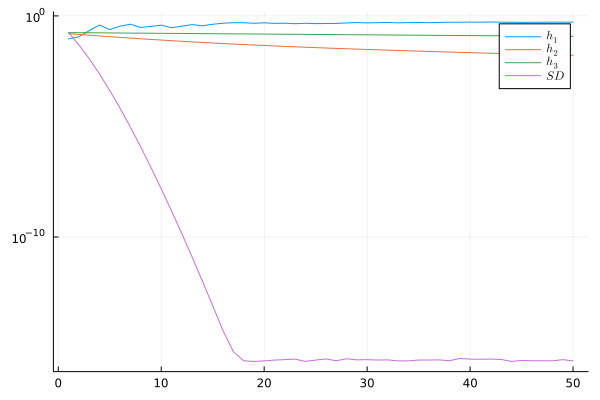

In [155]:
plot(1:max_N,
    [errs_h1,errs_h2,errs_h3,errs_sd],
    yscale=:log10,
    labels=[L"h_1" L"h_2" L"h_3" L"SD"])

We see exponential convergence along our deformed contour, with our optimal mesh width. The other approaches converge at a much slower rate, if at all!